In [1]:
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
img = Image.open('img_in/david-clode-rTEt2xxdOvI-unsplash.jpg')
img_pxs = np.array(img)

Исходное изображение

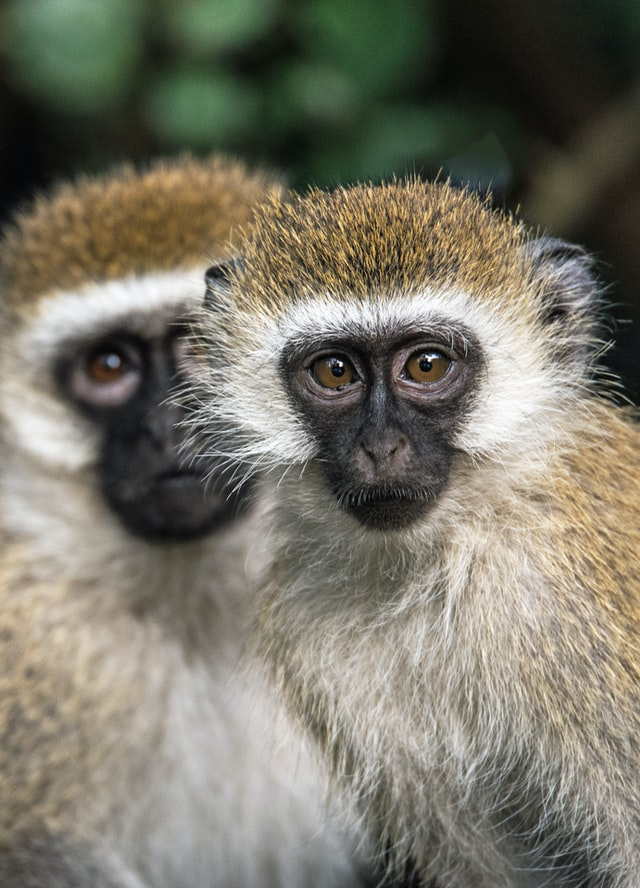

In [16]:
img

In [17]:
def histPlotImage(img: Image.Image):
    """
    The function show hist plot
    :params img input your img in RGB 
    :type img PIL.Image.Image
    """
    img = np.array(img)
    values, bin_edges, patches = plt.hist(img.ravel(), bins=range(257))
    plt.xlabel('brightness')
    plt.ylabel('count pixel')
    plt.title('image hist')
    plt.show()

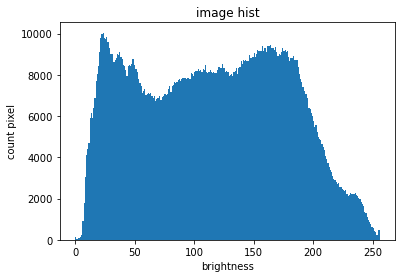

In [19]:
histPlotImage(img)

Искуственно уменьшим контраст 

In [20]:
low_img = Image.fromarray(img_pxs//2)
low_img_px = np.array(low_img)

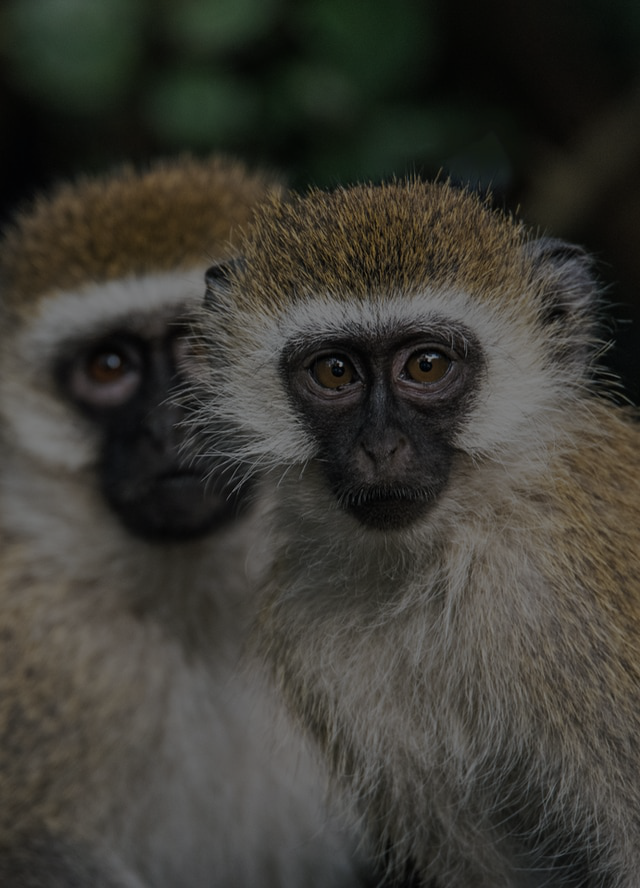

In [21]:
low_img.save('img_out/low_contrast_monkey.jpg')
low_img

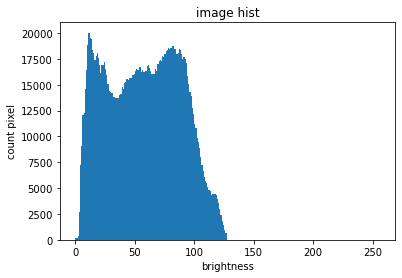

In [22]:
histPlotImage(low_img)

In [23]:
def thresholdValue(img: Image.Image)->tuple:
    """ 
    The function returns threshold values for each channel 
    :params img input your img in RGB 
    :type img PIL.Image.Image
    :return tuple(list, list)
    """
    red, green, blue = img.split()
    arrays_chan = list(map(np.array, [red, green, blue]))
    minchan = list(map(np.min, arrays_chan))
    maxchan = list(map(np.max, arrays_chan))
    return minchan, maxchan

In [24]:
def linearContrast(img: Image.Image):
    """
    The function is implemented linear contrasting for RGB channels in the image. 
    It normalizes each image channel
    :params img input your img in RGB 
    :type img PIL.Image.Image
    :return PIL.Image.Image
    """
    red, green, blue = img.split()
    red, green, blue = list(map(np.array, [red, green, blue]))
    minimum, maximum = thresholdValue(img)
    minred, mingreen, minblue = minimum
    maxred, maxgreen, maxblue = maximum
    outputred = (red - minred)*(1/(maxred - minred))
    outputgreen = (green - mingreen)*(1/(maxgreen - mingreen))
    outputblue = (blue - minblue)*(1/(maxblue - minblue))
    merged_chan = np.dstack((outputred*255, outputgreen*255, outputblue*255))
    output_img = Image.fromarray(np.uint8(merged_chan))
    return output_img

In [25]:
output_img = linearContrast(low_img)
output_img.save('img_out/output_monkey.jpg')

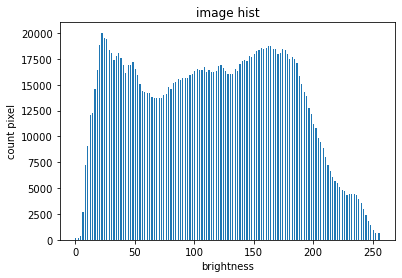

In [26]:
histPlotImage(output_img)

In [27]:
preparing_img = Image.fromarray(np.array(output_img)//4+100)
preparing_img.save('img_out/preparing_monkey.jpg')

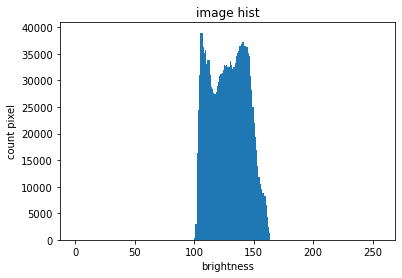

In [28]:
histPlotImage(preparing_img)